Could look at: 2020 data vs 2021 data? Boro by boro? GHG emissions vs EUI? Building type contributions to GHG? fuel type contributions to GHG? Fuel types by usage types? Combo high EUI and high ghg emissions areas/neighborhoods?

Map with top 10 GHG emitters per boro? What percent of that boros emissions do they make up?

Who is still using fuel oil?

building usage types with highest GHG emissions?

What to do with suspicious EUIs

Which usage types saw greatest decrease in emissions from 2019 to 2020?

Do i want to include population of each borough? I feel like no since commuting makes it not really accurate

suggestion to the city-- data inputting form should check for impossible EUIs to get better data.

In [1]:
!head LL84_2020.csv

Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),

In [96]:
import pandas as pd
import numpy as np
import plotly
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [98]:
col_of_interest = ["Property Id", "Address 1", "Postcode","Primary Property Type - Self Selected",\
                   "Year Built", "Site EUI (kBtu/ft²)", "Site Energy Use (kBtu)",\
                   "Total GHG Emissions (Metric Tons CO2e)", "Borough",\
                   'Largest Property Use Type - Gross Floor Area (ft²)',\
                   '2nd Largest Property Use - Gross Floor Area (ft²)',\
                   '3rd Largest Property Use Type - Gross Floor Area (ft²)']

data2020 = pd.read_csv('Data_2020.csv', usecols = col_of_interest, dtype = {"Address 1": str, \
                                                                          }, na_values = ["Not Available"])

data2019 = pd.read_csv('Data_2019.csv', usecols = col_of_interest, dtype = {"Address 1": str, \
                                                                          }, na_values = ["Not Available"])
#deal with annoying column names
#deal with annoying missing things and assign data types

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [99]:
data2020['GSF'] = np.nansum([data2020['3rd Largest Property Use Type - Gross Floor Area (ft²)'],\
data2020['2nd Largest Property Use - Gross Floor Area (ft²)'],\
data2020['Largest Property Use Type - Gross Floor Area (ft²)']], axis = 0)


data2020 = data2020.drop(['Largest Property Use Type - Gross Floor Area (ft²)',\
               '2nd Largest Property Use - Gross Floor Area (ft²)',\
               '3rd Largest Property Use Type - Gross Floor Area (ft²)'], axis = 1)



In [77]:
data2020

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Borough,GSF
0,7365,1155 Avenue of the Americas,10036,Office,1982,41.7,28621509.3,2190.6,MANHATTAN,686838.0
1,8139,200 East 42nd St.,10017,Office,1956,234.9,90318696.0,6184.2,MANHATTAN,384432.0
2,8604,114 West 47th st,10036,Financial Office,1989,56.0,32329714.8,2407.5,MANHATTAN,577534.0
3,8841,733 Third Avenue,10017,Office,1961,70.4,27516842.6,2003.9,MANHATTAN,390878.0
4,11809,4 Times Square,10036,Office,1999,78.7,126054250.5,8976.8,MANHATTAN,1601977.0
...,...,...,...,...,...,...,...,...,...,...
28062,17286197,109 W 129th St,10027,Senior Living Community,1920,117.3,3088625.0,184.0,MANHATTAN,26324.0
28063,17298485,110-31 Merrick Boulevard,11433,Worship Facility,1997,NaN,NaN,0.0,QUEENS,32017.0
28064,17298486,110-31A Merrick Boulevard,11433,Worship Facility,1997,NaN,NaN,0.0,QUEENS,41756.0
28065,17321529,402 EAST 78 STREET,10075,Multifamily Housing,1910,88.9,2318409.0,139.3,MANHATTAN,26090.0


In [22]:
data2020.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()

,Total GHG Emissions (Metric Tons CO2e)
Borough,
BRONX,6669110.9
BROOKLYN,2995492.6
MANHATTAN,8969144.0
QUEENS,2557647.0
STATEN IS,412257.3


In [35]:
type(data2020["Total GHG Emissions (Metric Tons CO2e)"][0])

str

In [23]:
data2019.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()

,Total GHG Emissions (Metric Tons CO2e)
Borough,
BRONX,2798239.2
BROOKLYN,3471987.0
MANHATTAN,11694356.2
QUEENS,3136121.8
STATEN IS,501618.1


In [47]:
comparison = pd.concat([data2019.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum(),\
       data2020.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()], axis = 1)

# comparison['Percent_Change'] = comparison[[1]]-comparison[[2]]

comparison.columns = ['2019_MTCO2e','2020_MTCO2e']
comparison['Percent_Change'] = 100*(comparison['2020_MTCO2e'] - comparison['2019_MTCO2e'])/comparison['2019_MTCO2e']

comparison
#this makes me suspicious of bronx data

,2019_MTCO2e,2020_MTCO2e,Percent_Change
Borough,,,
BRONX,2798239.2,6669110.9,138.332409
BROOKLYN,3471987.0,2995492.6,-13.723968
MANHATTAN,11694356.2,8969144.0,-23.303653
QUEENS,3136121.8,2557647.0,-18.445546
STATEN IS,501618.1,412257.3,-17.814509


In [78]:
#looking at bronx

bronx2020 = data2020[data2020['Borough'] == "BRONX"]
bronx2020.sort_values(['Total GHG Emissions (Metric Tons CO2e)'], ascending = False)
#Aha. somebody got their data way wrong. 4 million tons co2e from a senior care community. Should def remove this one.

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Borough,GSF
19073,6720128,2175 Quarry Road,10457,Senior Care Community,1943,152022.8,6.403716e+10,4250523.3,BRONX,421234.0
11366,5949517,2020 East Tremont Avenue,10462,Multifamily Housing,1939,383.4,9.237396e+08,50433.3,BRONX,2409161.0
24767,12049536,1980-2040 East Tremont Avenue,10462,Multifamily Housing,1939,367.2,9.237013e+08,50430.3,BRONX,2808161.0
27541,16087623,2000 East Tremont Avenue,10462,Multifamily Housing,1941,94.7,8.340865e+08,48051.9,BRONX,8850612.0
2991,2698145,1300 Morris Park Avenue,10461,Other,1954,524.7,6.837148e+08,40674.7,BRONX,1303020.0
...,...,...,...,...,...,...,...,...,...,...
25518,12899134,1190 LONGWOOD AVE.,10474,Manufacturing/Industrial Plant,1950,NaN,NaN,NaN,BRONX,33000.0
25645,13294622,2197 Cruger Avenue,10462,Multifamily Housing,1928,NaN,NaN,NaN,BRONX,70296.0
27545,16089230,695 E139th Street,10454,Multifamily Housing,1969,NaN,NaN,NaN,BRONX,12849.0
27569,16089942,560 E144th Street,10454,Multifamily Housing,1970,NaN,NaN,NaN,BRONX,7308.0


In [91]:
data2020 = data2020.loc[data2020['Property Id'] != 6720128]

In [79]:
#looking at Manhattan

manhattan2020 = data2020[data2020['Borough'] == 'MANHATTAN']
manhattan2020.sort_values(['Total GHG Emissions (Metric Tons CO2e)'], ascending = False)

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Borough,GSF
7117,3616399,70 Washington Square South,10012,Mixed Use Property,1833,201.0,1.386890e+09,78844.2,MANHATTAN,5990300.0
9115,4452255,550 First Avenue,10016,Hospital (General Medical & Surgical),1952,353.2,1.250287e+09,73126.4,MANHATTAN,3540298.0
7983,4143131,522 First Avenue,10016,Laboratory,2006,4530.8,1.178089e+09,67510.9,MANHATTAN,260016.0
5003,2826188,251 Mercer Street,10012,College/University,1966,6841.7,1.220034e+09,66091.7,MANHATTAN,178324.0
27896,16828455,31 W 34 St,10001,Office,1912,3586.8,9.885525e+08,65718.5,MANHATTAN,275609.0
...,...,...,...,...,...,...,...,...,...,...
25328,12484699,7 East 72nd Street,10021,Single Family Home,1960,NaN,NaN,NaN,MANHATTAN,41500.0
25526,12902042,320 Manhattan Avenue,10026,Multifamily Housing,1920,NaN,NaN,NaN,MANHATTAN,44622.0
25552,12903880,350 Manhattan Avenue,10026,Multifamily Housing,1927,NaN,NaN,NaN,MANHATTAN,47730.0
25612,13055800,110 Wall Street,10005,Hotel,1965,NaN,NaN,NaN,MANHATTAN,267570.0


Text(0, 0.5, 'EUI')

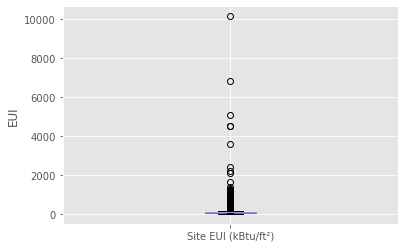

In [92]:
# plt.hist(manhattan2020['Site EUI (kBtu/ft²)'])
data2020[['Site EUI (kBtu/ft²)']].boxplot()
plt.ylabel('EUI')

#still have some big outliers but not as bad as before.

In [95]:
data2020.sort_values(['Site EUI (kBtu/ft²)'], ascending = False).head(15)
#Hm. I guess energy/power station makes sense to have high energy use?

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Borough,GSF
11101,5863726,2701 WEST 6 ST,11224,Energy/Power Station,1965,10164.9,6.464850e+08,34337.9,BROOKLYN,63600.0
5003,2826188,251 Mercer Street,10012,College/University,1966,6841.7,1.220034e+09,66091.7,MANHATTAN,178324.0
22413,8726877,4435 Victory Boulevard,10314,Manufacturing/Industrial Plant,1996,5101.0,2.236953e+09,132207.6,STATEN IS,438530.0
7983,4143131,522 First Avenue,10016,Laboratory,2006,4530.8,1.178089e+09,67510.9,MANHATTAN,260016.0
1965,2658585,530 West 120th Street,10027,College/University,1988,4522.6,9.949322e+08,56204.4,MANHATTAN,219993.0
27896,16828455,31 W 34 St,10001,Office,1912,3586.8,9.885525e+08,65718.5,MANHATTAN,275609.0
22420,8729534,4300 Murdock Ave,10466,K-12 School,1925,2427.6,4.617080e+08,669.1,BRONX,158463.0
27740,16692910,975 ESSEX STREET,11208,Manufacturing/Industrial Plant,1951,2214.9,7.973485e+07,4584.7,BROOKLYN,36000.0
26338,15150441,158-14 Cross Island Parkway,11357,Multifamily Housing,1952,2084.9,1.163349e+07,818.7,QUEENS,5580.0
1296,2557733,200 East 71st Street,10021,Multifamily Housing,1961,1638.1,4.357030e+08,25320.3,MANHATTAN,267980.0
